# Predicting Student Academic Performance using artificial neural networks

In [43]:
import pandas as pd    # for data analysis
import numpy as np     # a libraru for array functions
import matplotlib.pyplot as plt # for making plots
import seaborn as sns  # a plotting package built on top of pandas

#import machine learning modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

#import feature importance modules
# !pip install yellowbrick #uncomment if yellowbrick module not installed
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier

In [44]:
data = pd.read_csv('../input/xAPI-Edu-Data/xAPI-Edu-Data.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [45]:
data.tail()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L
479,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,35,14,23,62,No,Bad,Above-7,L


In [46]:
data.shape

(480, 17)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

## Renaming feature names
For more intuitiveness, we will be renaming the following columns:  
NationalITy ➡ Nationality  
VisITedResources ➡ VisitedResources  
ParentschoolSatisfaction ➡ ParentSchoolSatisfaction  
raisedhands ➡ raisedHands  

In [48]:
data.rename(columns={'NationalITy':'Nationality',
'VisITedResources':'VisitedResources',
'ParentschoolSatisfaction':'ParentSchoolSatisfaction',
'raisedhands':'raisedHands'}, inplace=True) 

In [49]:
data.head()

,gender,Nationality,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### Minor Tweaks here and there:

I will be dropping the `PlaceofBirth` column as it is the same as the `Nationality` 

In [50]:
data.drop(columns='PlaceofBirth', inplace=True)

In [51]:
print(list(data.columns), sep=' ')

['gender', 'Nationality', 'StageID', 'GradeID', 'SectionID', 'Topic', 'Semester', 'Relation', 'raisedHands', 'VisitedResources', 'AnnouncementsView', 'Discussion', 'ParentAnsweringSurvey', 'ParentSchoolSatisfaction', 'StudentAbsenceDays', 'Class']


'Kuwait' is represented as 'KW' in Nationality. I'll change it with this cell below:

In [52]:
data['Nationality'].replace({'KW':'Kuwait'}, inplace=True)

# Features in the data

|Feature  | Description |
|:--------|:------------|
|Gender | student's gender (nominal: 'Male' or 'Female’) |
|Nationality | student's nationality (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’, ’Jordan’,’Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)|
|Place of birth | student's Place of birth (nominal:’ Kuwait’,’ Lebanon’,’ Egypt’,’ SaudiArabia’,’ USA’,’ Jordan’,’Venezuela’,’ Iran’,’ Tunis’,’ Morocco’,’ Syria’,’ Palestine’,’ Iraq’,’ Lybia’)|
|Educational Stages | educational level student belongs (nominal:‘lowerlevel’, ’MiddleSchool’, ’HighSchool’)|
|Grade Levels | grade student belongs (nominal: ‘G-01’, ‘G-02’, ‘G-03’, ‘G-04’, ‘G-05’, ‘G-06’, ‘G-07’, ‘G-08’, ‘G-09’, ‘G-10’, ‘G-11’, ‘G-12 ‘)|
|Section ID | classroom student belongs (nominal:’A’,’B’,’C’)|
|Topic | course topic (nominal:’ English’,’ Spanish’, ‘French’,’ Arabic’,’ IT’,’ Math’,’ Chemistry’, ‘Biology’, ‘Science’,’ History’,’ Quran’,’ Geology’)|
|Semester | school year semester (nominal:’ First’,’ Second’)|
|Relation | Parent responsible for student (nominal:’Mum’,’Father’)|
|Raised hand | how many times the student raises his/her hand on classroom (numeric:0-100)|
|Visited resources | how many times the student visits a course content (numeric:0-100)|
|Viewing announcements | how many times the student checks the new announcements (numeric:0-100)|
|Discussion groups | how many times the student participate on discussion groups (numeric:0-100)|
|Parent Answering Survey | parent answered the surveys which are provided from school or not ( nominal: ’Yes’,’No’)|
|Parent School Satisfaction | the Degree of parent satisfaction from school (nominal:’Yes’,’No’)|
|Student Absence Days | the number of absence days for each student (nominal: above-7, under-7)|

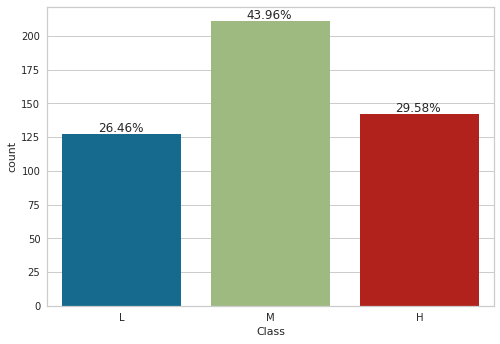

In [53]:
ax = sns.countplot(x='Class', data=data, order=['L', 'M', 'H'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(data)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

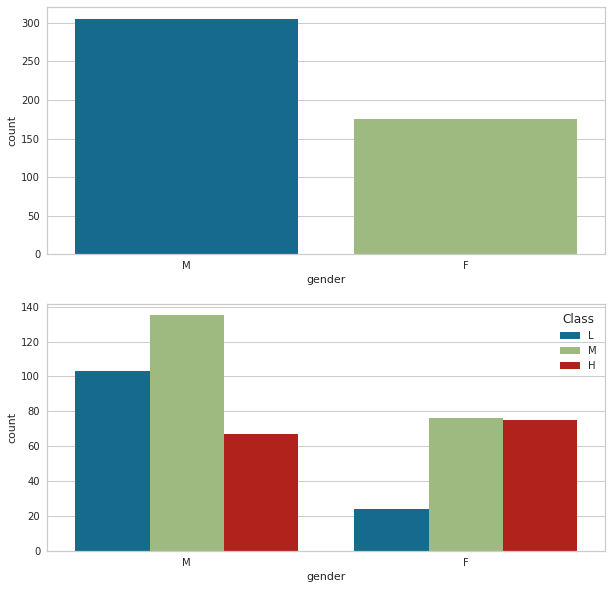

In [54]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='gender', data=data, order=['M','F'], ax=axarr[0])
sns.countplot(x='gender', hue='Class', data=data, order=['M', 'F'],hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

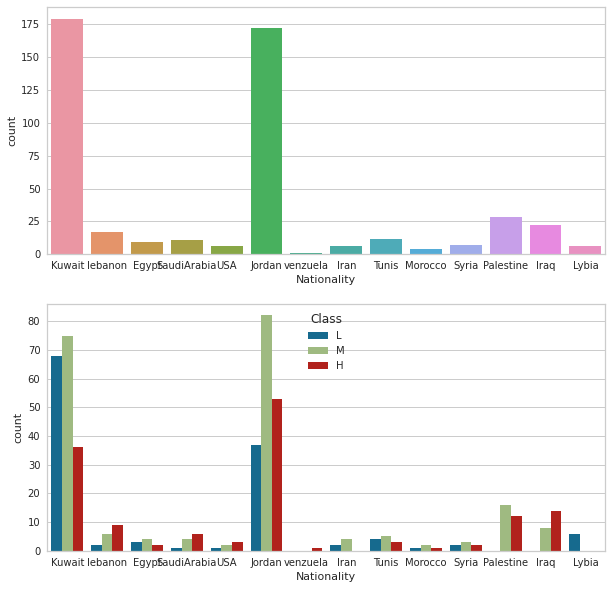

In [55]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Nationality', data=data, ax=axarr[0])
sns.countplot(x='Nationality', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

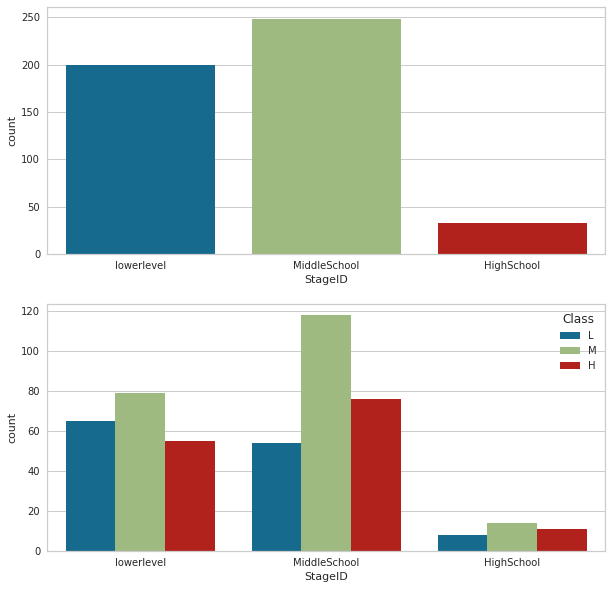

In [56]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='StageID', data=data, ax=axarr[0])
sns.countplot(x='StageID', hue='Class', data=data, hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

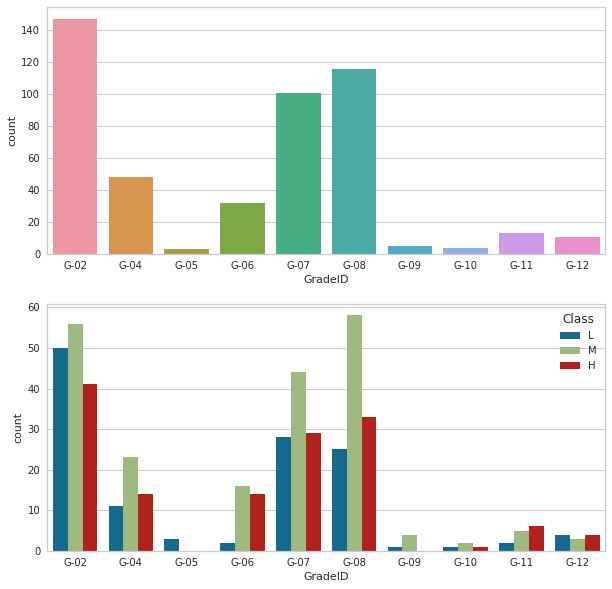

In [57]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='GradeID', data=data, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], ax=axarr[0])
sns.countplot(x='GradeID', hue='Class', data=data, order=['G-02', 'G-04', 'G-05', 'G-06', 'G-07', 'G-08', 'G-09', 'G-10', 'G-11', 'G-12'], hue_order = ['L', 'M', 'H'], ax=axarr[1])
plt.show()

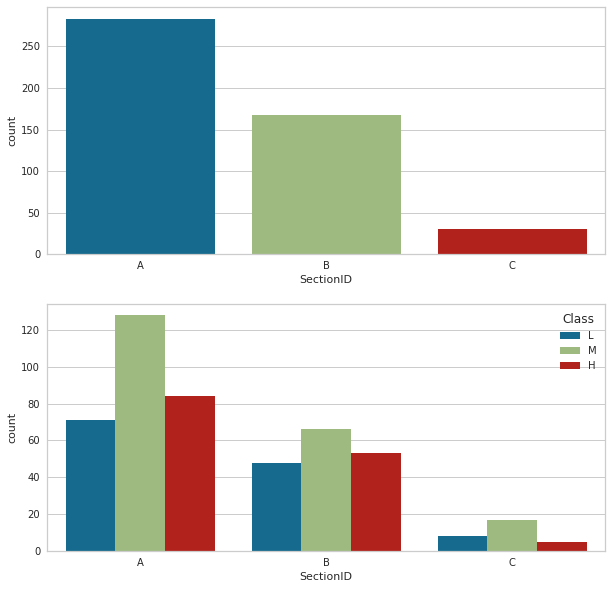

In [58]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='SectionID', data=data, order=['A', 'B', 'C'], ax = axarr[0])
sns.countplot(x='SectionID', hue='Class', data=data, order=['A', 'B', 'C'],hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

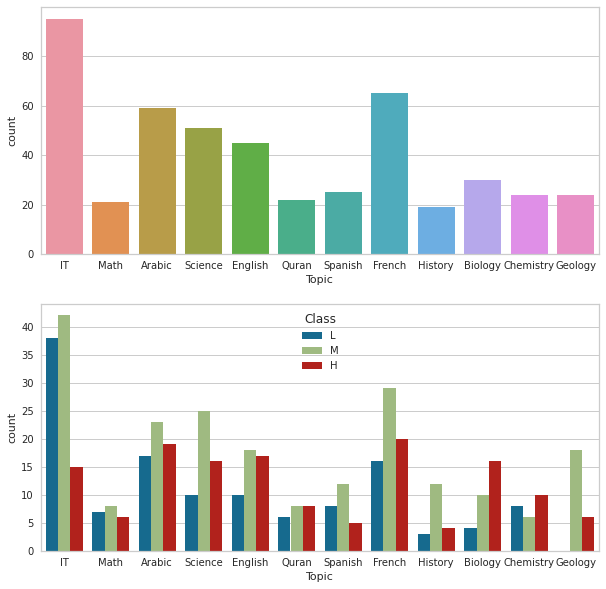

In [59]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Topic', data=data, ax = axarr[0])
sns.countplot(x='Topic', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

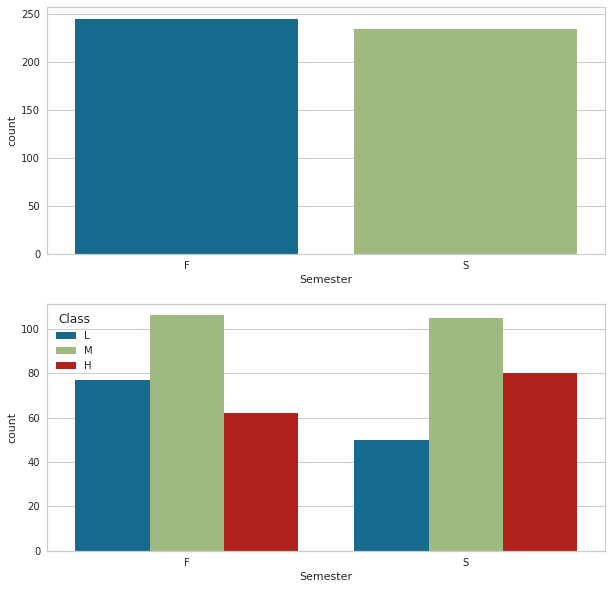

In [60]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Semester', data=data, ax = axarr[0])
sns.countplot(x='Semester', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

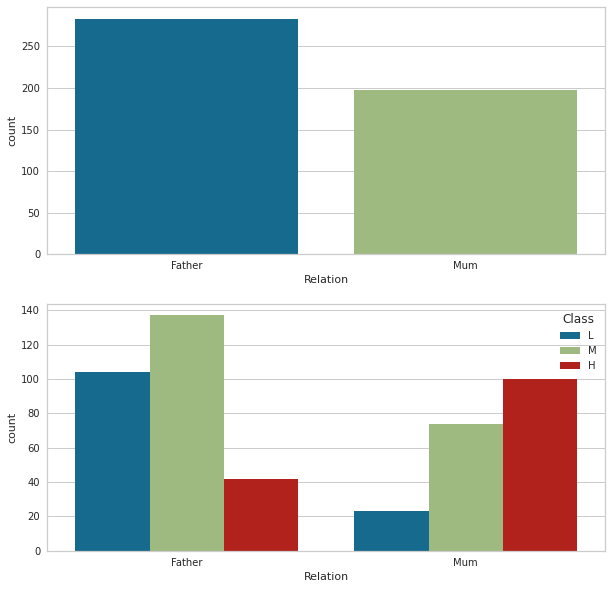

In [61]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='Relation', data=data, ax = axarr[0])
sns.countplot(x='Relation', hue='Class', data=data,hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

### Visualizing the continuous data in the numeric features

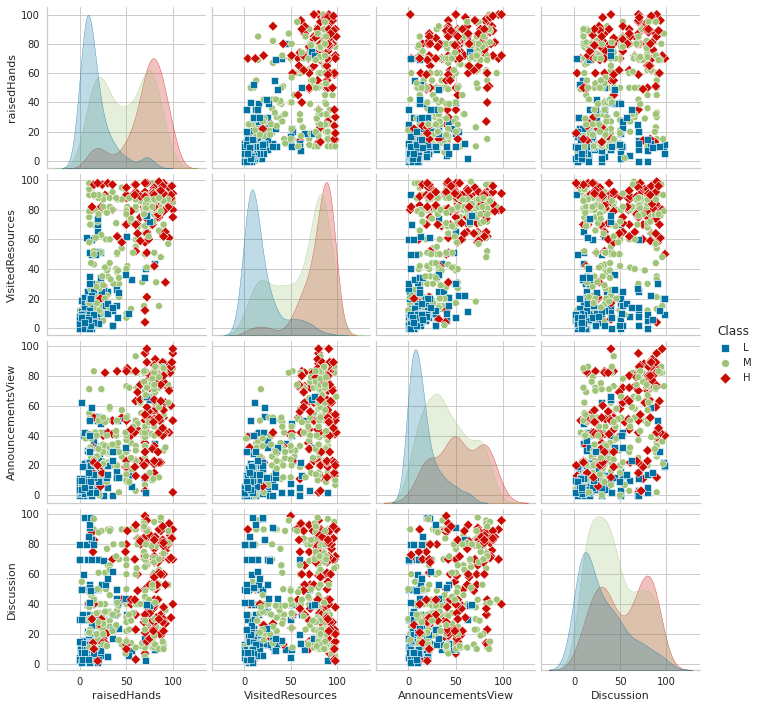

In [62]:
sns.pairplot(data, hue="Class", diag_kind="kde", hue_order = ['L', 'M', 'H'], markers=["o", "s", "D"])
plt.show()

In [63]:
data.groupby('Topic').median()

,raisedHands,VisitedResources,AnnouncementsView,Discussion
Topic,,,,
Arabic,32.0,65.0,41.0,38.0
Biology,78.5,88.5,54.0,47.0
Chemistry,79.0,84.5,47.0,30.5
English,55.0,50.0,33.0,36.0
French,35.0,80.0,23.0,21.0
Geology,80.0,82.0,68.5,60.5
History,69.0,84.0,72.0,65.0
IT,20.0,25.0,10.0,40.0
Math,28.0,15.0,19.0,40.0


#### Here we can see part of the likely reason why the all of the geology students pass. They have far higher median numerical values than most other courses.

In [64]:
data.groupby('GradeID').median()

,raisedHands,VisitedResources,AnnouncementsView,Discussion
GradeID,,,,
G-02,27.0,60.0,21.0,30.0
G-04,45.5,50.0,33.0,43.5
G-05,8.0,10.0,9.0,30.0
G-06,72.0,61.0,49.0,36.5
G-07,50.0,71.0,33.0,50.0
G-08,70.5,77.0,45.5,40.5
G-09,20.0,35.0,30.0,44.0
G-10,33.5,41.5,24.0,26.0
G-11,70.0,63.0,50.0,49.0


#### Here, looking at the median data again we can see part of the likely reason why the 5th and 9th grade students performed as they did as well.

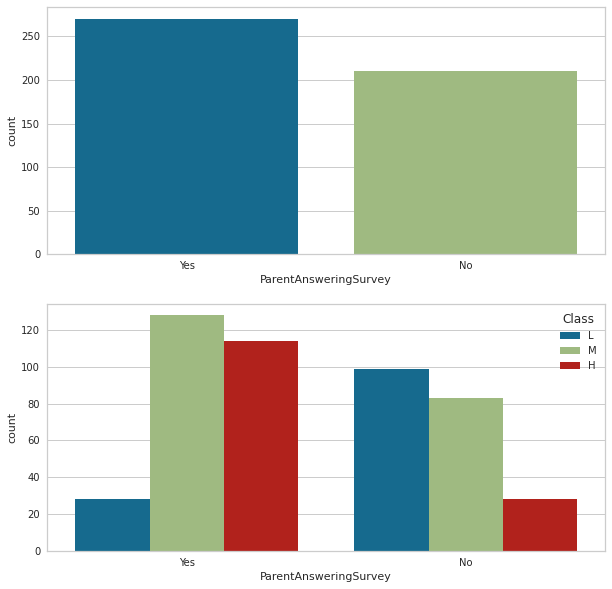

In [65]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='ParentAnsweringSurvey', data=data, order=['Yes', 'No'], ax = axarr[0])
sns.countplot(x='ParentAnsweringSurvey', hue='Class', data=data, order=['Yes', 'No'], hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

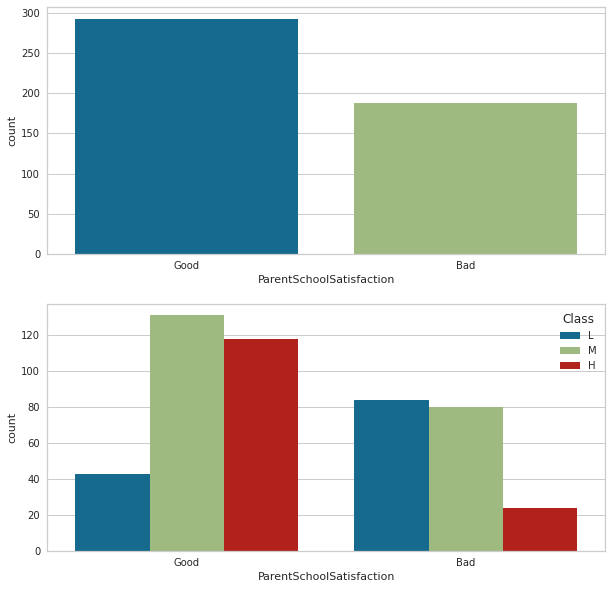

In [66]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='ParentSchoolSatisfaction', data=data, order=['Good', 'Bad'], ax = axarr[0])
sns.countplot(x='ParentSchoolSatisfaction', hue='Class', data=data, order=['Good', 'Bad'],hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

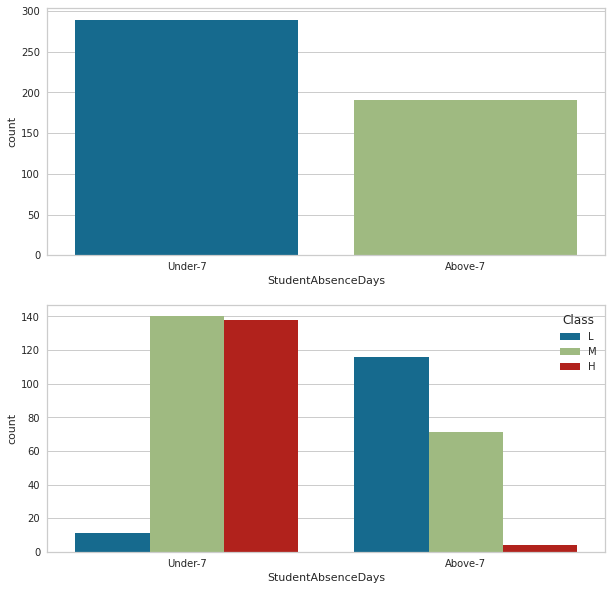

In [67]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='StudentAbsenceDays', data=data, order=['Under-7', 'Above-7'], ax = axarr[0])
sns.countplot(x='StudentAbsenceDays', hue='Class', data=data, order=['Under-7', 'Above-7'],hue_order = ['L', 'M', 'H'], ax = axarr[1])
plt.show()

## Preprocessing the Data
Data preprocessing consists of the steps that were taken to prepare our data for the artificial neural network.

In [68]:
X = data.drop(columns='Class')
y = data['Class']

In [69]:
X.head()

,gender,Nationality,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedHands,VisitedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentSchoolSatisfaction,StudentAbsenceDays
0,M,Kuwait,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7
1,M,Kuwait,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7
2,M,Kuwait,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7
3,M,Kuwait,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7
4,M,Kuwait,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7


In [70]:
X = pd.get_dummies(X)

In [71]:
shape = X.shape
print(f'Number of rows: {shape[0]}\nNumber of columns: {shape[1]}')

Number of rows: 480
Number of columns: 58


In [72]:
X.head()

,raisedHands,VisitedResources,AnnouncementsView,Discussion,gender_F,gender_M,Nationality_Egypt,Nationality_Iran,Nationality_Iraq,Nationality_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentSchoolSatisfaction_Bad,ParentSchoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


We'll be setting the `random_state` to 42 for reproducibility

In [73]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Definition

In [74]:
model = MLPClassifier(random_state=42, max_iter=1000)

In [75]:
model.fit(train_X, train_y)

MLPClassifier(max_iter=1000, random_state=42)

In [76]:
pred_y = model.predict(test_X)

In [77]:
pred_y

array(['M', 'L', 'H', 'H', 'H', 'M', 'L', 'M', 'M', 'M', 'H', 'H', 'M',
       'L', 'M', 'H', 'L', 'M', 'L', 'M', 'M', 'H', 'M', 'M', 'L', 'L',
       'H', 'M', 'L', 'M', 'M', 'M', 'L', 'M', 'M', 'H', 'M', 'M', 'M',
       'M', 'H', 'M', 'L', 'M', 'H', 'L', 'H', 'M', 'H', 'M', 'M', 'M',
       'L', 'M', 'M', 'H', 'L', 'H', 'M', 'L', 'M', 'L', 'L', 'H', 'M',
       'M', 'L', 'H', 'L', 'M', 'M', 'H', 'M', 'M', 'M', 'M', 'M', 'L',
       'L', 'H', 'H', 'M', 'M', 'H', 'M', 'M', 'M', 'L', 'L', 'M', 'M',
       'M', 'M', 'M', 'L', 'H', 'L', 'H', 'M', 'L', 'M', 'L', 'L', 'H',
       'M', 'H', 'H', 'L', 'M', 'L', 'M', 'M', 'M', 'H', 'M', 'L', 'H',
       'M', 'H', 'L'], dtype='<U1')

## Evaluating the model

In [78]:
cm = confusion_matrix(test_y, pred_y)
cm

array([[22,  0,  6],
       [ 0, 27,  7],
       [ 7,  4, 47]])

<AxesSubplot:>

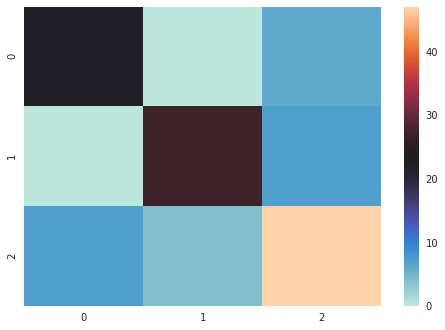

In [79]:
sns.heatmap(cm, cmap='icefire')

In [80]:
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

           H       0.76      0.79      0.77        28
           L       0.87      0.79      0.83        34
           M       0.78      0.81      0.80        58

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120



### Feature Importance
We'll be using the yellowbrick library to plot the various feature importances

In [81]:
new_X = data.drop(columns='Class')
new_y = data['Class']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.25, random_state=42)

In [83]:
fi_model = RandomForestClassifier()
plt.figure(figsize=(25,20), dpi=400)
viz = FeatureImportances(fi_model) # create a visualizer using the random forest estimator
viz.fit(train_X, train_y)
# viz.show(outpath='feature importances.png')
viz.show();